In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_excel('gpsdata.xlsx')

In [49]:
df.tDateTime = pd.to_datetime(df.tDateTime, utc=True).dt.tz_convert('Asia/Taipei')
df['TestProgramVersion'] = df.exeinfo.apply(lambda info : info.split('[')[2][:-20])

CT_GPS_L1 by ref

In [57]:
ct_L1 = df.loc[(df.ItemNameType==15686) & (df.Item20St.isin([0,1])),['SerialNumber','Item20St','Item20','Temperature','Station','StationID','Version','TestProgramVersion','tDateTime']].sort_values(['SerialNumber','tDateTime'])

In [58]:
NG_ESN = ct_L1.loc[ct_L1.Item20St == 0,'SerialNumber'].drop_duplicates()
NG_ESN

135    3422061931
176    3422061990
49     3422061998
96     3422062044
105    3422062060
99     3422062066
11     3422062094
319    3422062096
185    3422062215
191    3422062222
251    3422062244
272    3422062279
266    3422062283
281    3422062286
293    3422062317
284    3422062319
455    3425559295
Name: SerialNumber, dtype: int64

In [59]:
ct_L1 = ct_L1[ct_L1.SerialNumber.isin(NG_ESN)].sort_values(['SerialNumber','tDateTime'])

In [110]:
ct_L1 = ct_L1[(ct_L1.tDateTime<'2022-07-28')]
#ct_L1 = ct_L1[(ct_L1.tDateTime<'2022-07-28') & (ct_L1.Station=='T1_5PR1AC02')]
#ct_L1.drop(index=[1249,1296,1297], inplace=True)
#ct_L1 = ct_L1[ct_L1.duplicated(subset='SerialNumber',keep=False)]
ct_L1

,SerialNumber,Item20St,Item20,Temperature,Station,StationID,Version,TestProgramVersion,tDateTime
135,3422061931,0,-5.949999,-6,T1_5PR1AC02,2,9.1,MarQ2_CT 2.3,2022-07-20 19:03:06+08:00
141,3422061931,0,-5.879999,-1,T1_5PR1AC02,3,9.1,MarQ2_CT 2.3,2022-07-20 19:11:15+08:00
195,3422061931,0,-6.199999,-5,T1_5PR1AC02,3,9.1,MarQ2_CT 2.3,2022-07-21 10:26:30+08:00
324,3422061931,1,1.019999,-6,T1_5PR1AC01,2,9.1,MarQ2_CT 2.3,2022-07-22 10:54:20+08:00
176,3422061990,0,-2.249998,-9,T1_5PR1AC02,4,9.1,MarQ2_CT 2.3,2022-07-21 09:41:44+08:00
194,3422061990,1,-1.979999,-10,T1_5PR1AC02,3,9.1,MarQ2_CT 2.3,2022-07-21 10:22:44+08:00
197,3422061990,1,-1.929998,-3,T1_5PR1AC02,4,9.1,MarQ2_CT 2.3,2022-07-21 10:29:44+08:00
49,3422061998,0,-3.649999,-7,T1_5PR1AC01,2,9.1,MarQ2_CT 2.1,2022-07-20 12:18:24+08:00
63,3422061998,0,-3.910000,-8,T1_5PR1AC01,3,9.1,MarQ2_CT 2.1,2022-07-20 12:34:38+08:00
88,3422061998,0,-3.799999,-3,T1_5PR1AC02,3,9.1,MarQ2_CT 2.3,2022-07-20 17:54:44+08:00


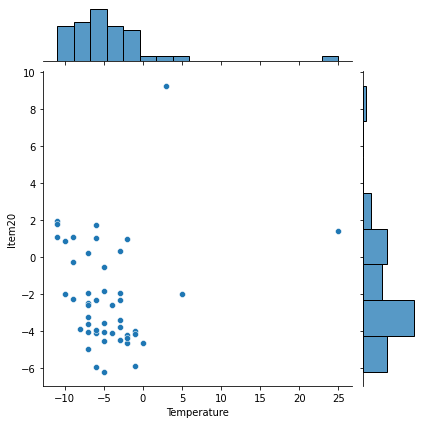

In [98]:
sns.jointplot(data=ct_L1, y='Item20',x='Temperature')
#plt.axhline(-2, color='r', ls='--')
#plt.axhline(2, color='r', ls='--')

In [56]:
ct_L1_d = ct_L1.drop_duplicates(subset=['SerialNumber','Item20St'], keep='last')
ct_L1_d

,SerialNumber,Item20St,Item20,Station,StationID,Version,TestProgramVersion,tDateTime,Temperature
195,3422061931,0,-6.199999,T1_5PR1AC02,3,9.1,MarQ2_CT 2.3,2022-07-21 10:26:30+08:00,-5
324,3422061931,1,1.019999,T1_5PR1AC01,2,9.1,MarQ2_CT 2.3,2022-07-22 10:54:20+08:00,-6
176,3422061990,0,-2.249998,T1_5PR1AC02,4,9.1,MarQ2_CT 2.3,2022-07-21 09:41:44+08:00,-9
197,3422061990,1,-1.929998,T1_5PR1AC02,4,9.1,MarQ2_CT 2.3,2022-07-21 10:29:44+08:00,-3
88,3422061998,0,-3.799999,T1_5PR1AC02,3,9.1,MarQ2_CT 2.3,2022-07-20 17:54:44+08:00,-3
112,3422062044,0,-4.089999,T1_5PR1AC02,2,9.1,MarQ2_CT 2.3,2022-07-20 18:30:55+08:00,-4
336,3422062044,1,1.739999,T1_5PR1AC01,2,9.1,MarQ2_CT 2.3,2022-07-22 12:27:19+08:00,-6
114,3422062060,0,-4.559999,T1_5PR1AC02,2,9.1,MarQ2_CT 2.3,2022-07-20 18:34:00+08:00,-5
332,3422062060,1,0.189999,T1_5PR1AC01,2,9.1,MarQ2_CT 2.3,2022-07-22 12:09:00+08:00,-7
113,3422062066,0,-4.169999,T1_5PR1AC02,3,9.1,MarQ2_CT 2.3,2022-07-20 18:30:55+08:00,-1


In [46]:
ct_L1_d.set_index('tDateTime').resample(rule='d')['Item20St'].agg(['sum','count'])

,sum,count
tDateTime,,
2022-07-20 00:00:00+08:00,2,7
2022-07-21 00:00:00+08:00,3,13
2022-07-22 00:00:00+08:00,10,11
